# 1. Target Value Identification and Exploration

The data was taken from [UCI's Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Online+Retail+II). The data set information states " This **Online Retail II** data set contains all the transactions occuring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers."

The **online_retail_II.xlsx** file had two spreadsheets. The first one, **Year 2009-2010** and the second one **Year 2010-2011** needed to be combined. I found a link titled "[How to Import Multiple Excel Sheets in Pandas](https://www.caktusgroup.com/blog/2019/08/13/import-multiple-excel-sheets-pandas/) I thought I should try. 

In [46]:
import pandas as pd

def read_excel_sheets(xls_path):
    ''' Read all sheets of an Excel workbook and return a single DataFrame'''
    print(f'Loading {xls_path} into pandas')
    xl = pd.ExcelFile(xls_path)
    df = pd.DataFrame()
    columns = None
    for idx, name in enumerate(xl.sheet_names):
        print(f'Reading sheet #{idx}: {name}')
        sheet = xl.parse(name)
        if idx == 0:
              # Save column names from the first sheet to match for append
              columns = sheet.columns
        sheet.columns = columns
        # Assume index of existing data frame when appended
        df = df.append(sheet, ignore_index=True)
    return df


In [47]:
df = read_excel_sheets('online_retail_II.xlsx')

Loading online_retail_II.xlsx into pandas
Reading sheet #0: Year 2009-2010
Reading sheet #1: Year 2010-2011


Now we're going to convert this into a single CSV for an easier upload in the future. 

In [3]:
df.to_csv('online_retail_merged.csv', index=False)

NameError: name 'df' is not defined

Wonderful. Now let's reread the data using the CSV file. 

In [49]:
df = pd.read_csv('online_retail_merged.csv')

Exploratory Data Analysis (EDA)

Using this step by step process for [EDA](https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis/notebook) found on Kaggle. 

In [50]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [51]:
df.tail(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


From just printing out the data frame's head() and tail(), I already have some questions on the dataset. 

- Change column titles to lowercase
- Create two columns for date, separating the date and time. 
- Create a total cost column (Quanity * Price). 
- Explore the top 5, 10, 25, etc. stockcode and their associated description. 
- Investigate if the price is associated with the country's currency. 

Let's continue our EDA.

In [52]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [53]:
# Check to see if column names were converted to lowercase
df.columns

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country'],
      dtype='object')

In [54]:
# Storing this variable
%store df

Stored 'df' (DataFrame)


In [55]:
df.shape

(1067371, 8)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
invoice        1067371 non-null object
stockcode      1067371 non-null object
description    1062989 non-null object
quantity       1067371 non-null int64
invoicedate    1067371 non-null object
price          1067371 non-null float64
customer_id    824364 non-null float64
country        1067371 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [57]:
df.isnull().any()

invoice        False
stockcode      False
description     True
quantity       False
invoicedate    False
price          False
customer_id     True
country        False
dtype: bool

In [58]:
numerical_df = df.select_dtypes(exclude='object')
numerical_df 

,quantity,price,customer_id
0,12,6.95,13085.0
1,12,6.75,13085.0
2,12,6.75,13085.0
3,48,2.10,13085.0
4,24,1.25,13085.0
...,...,...,...
1067366,6,2.10,12680.0
1067367,4,4.15,12680.0
1067368,4,4.15,12680.0
1067369,3,4.95,12680.0


In [33]:
categorical_df = df.select_dtypes(include='object')
categorical_df

,invoice,stockcode,description,invoicedate,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2009-12-01 07:45:00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,2009-12-01 07:45:00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,2009-12-01 07:45:00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",2009-12-01 07:45:00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,2009-12-01 07:45:00,United Kingdom
...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,2011-12-09 12:50:00,France


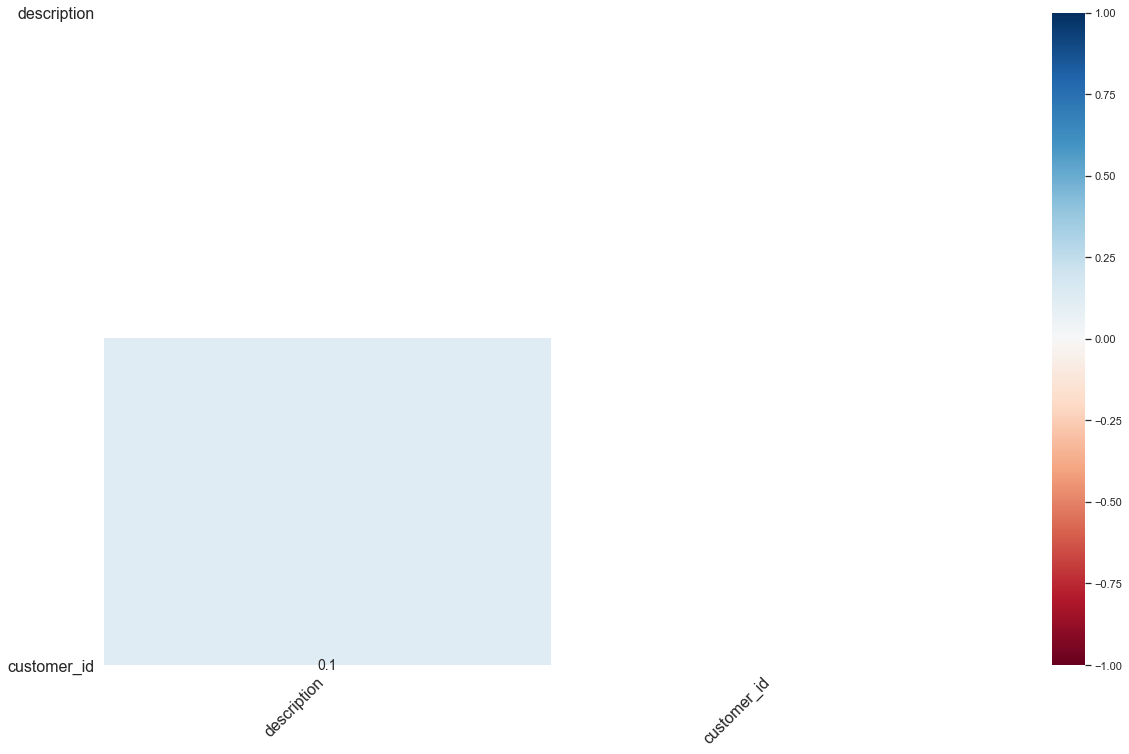

In [41]:
# missingno provies a small toolset of flexible and easy-to-use missing data visualizations and utilities
# that allow to get quick visual summary of the completeness (or lack thereof) of the dataset.
# https://github.com/ResidentMario/missingno

import missingno as msno
%matplotlib inline

msno.heatmap(df);

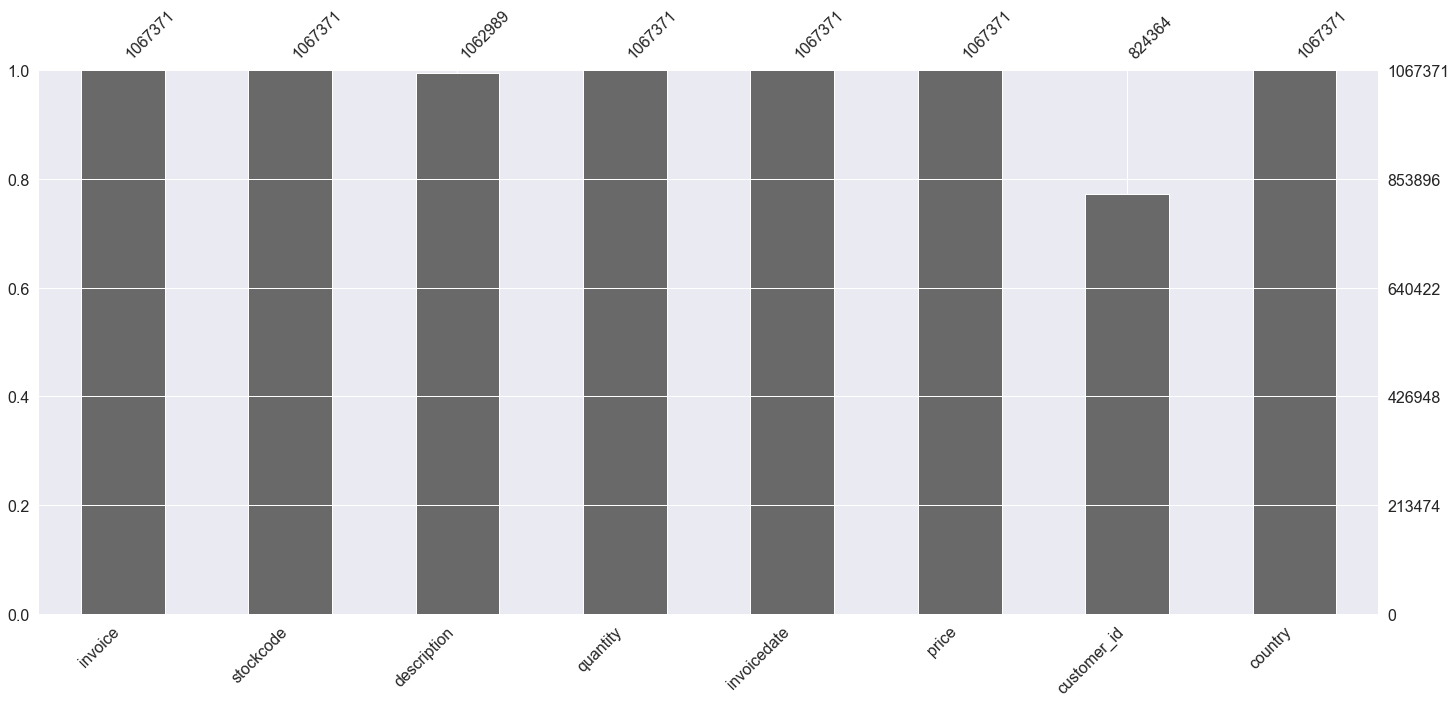

In [42]:
msno.bar(df);

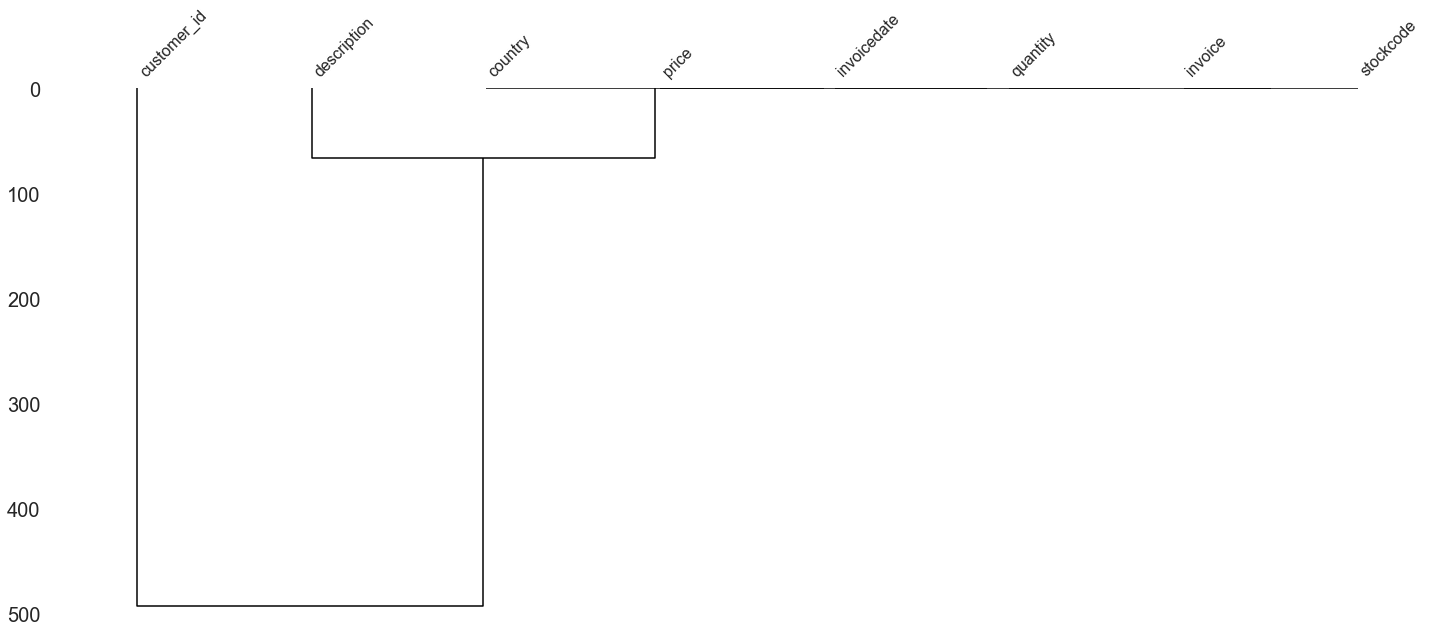

In [43]:
msno.dendrogram(df);

In [37]:
df.skew()

quantity        3.996145
price         -69.164734
customer_id     0.005778
dtype: float64

In [38]:
df.kurt()

quantity       155059.693401
price           73751.828955
customer_id        -1.184431
dtype: float64

Assuming what we've seen thus far, **price** seems like a logical choice for a target variable.

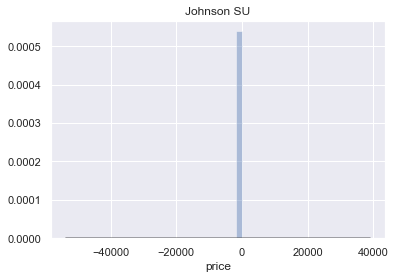

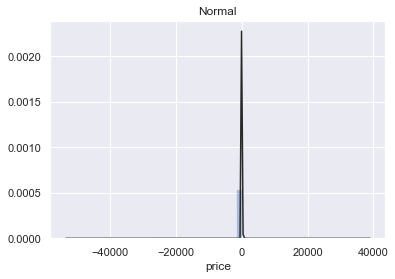

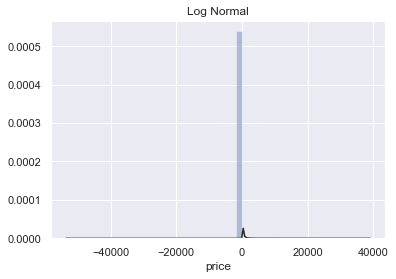

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

y = df.price
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

This shows me that we have some outliers. How can price be in the negative for this dataset?

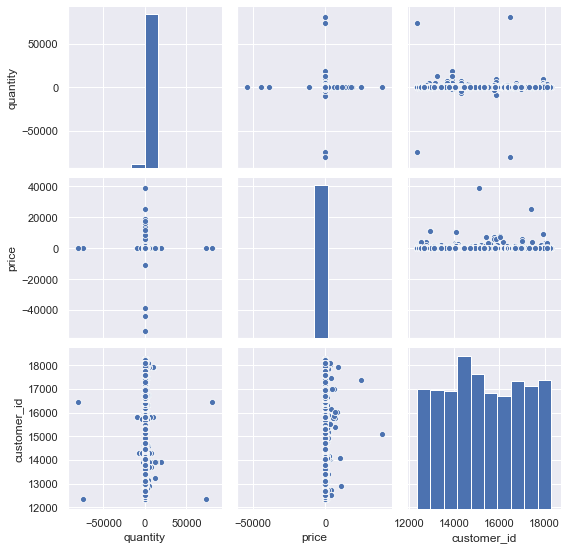

In [40]:
sns.set()
sns.pairplot(df, kind = 'scatter')
plt.show()

Based on what we've seen already, we have done some preliminary exploratory data analysis with the dataset in it's current state. Let's review the changes and observations made: 

- Changed: column names to lower case and with an underscore
- Concluded: Price is going to be my target variable
- Concluded: We have outliers in price that should be fixed


### Working Hypothesis:

$H_{o}:$ The mean cost per product is equal to BLANK. 

$H_{a}:$ The mean cost per product is greater to BLANK.


Let's  continue our project with other steps. 

1. Target Value Identification and Exploration

2. **Identify Datetimes for Split**

3. Numerical Values and DateTime Values

4. Boolean and Categorical Values

5. Coercing Datetimes (add_datepart), and handling na values

6. Train and Score Initial Model 

7. Plot/Coerce Target Variable (optional)

Storing variables resourece: [stackoverflow](https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks) and [advanced jupyter notebooks tutorial on dataquest](https://www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial/)

https://urbaninstitute.github.io/graphics-styleguide/